In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

# Phần 1

In [2]:
data = pd.read_csv('ex2data1.txt', names=['Score_1', 'Score_2', 'target'])
data.head()

# Score_1: Exam 1 Score
# Score_2: Exam 2 Score
# target: 1 - Admitted
#         0 - Not Admitted

,Score_1,Score_2,target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# Rescale data

data.loc[:, 'Score_1':'Score_2'] = StandardScaler().fit_transform(data.loc[:, 'Score_1':'Score_2'])

In [4]:
# Đưa features và target về ma trận để tính toán

X = data[['Score_1', 'Score_2']]
X = X.to_numpy()

y = data.target
y = y.to_numpy().reshape(-1, 1)

In [5]:
# Lấy các giá trị ứng với target (0 và 1)

pos = data.loc[data['target'] == 1, 'Score_1':'Score_2']
neg = data.loc[data['target'] == 0, 'Score_1':'Score_2']

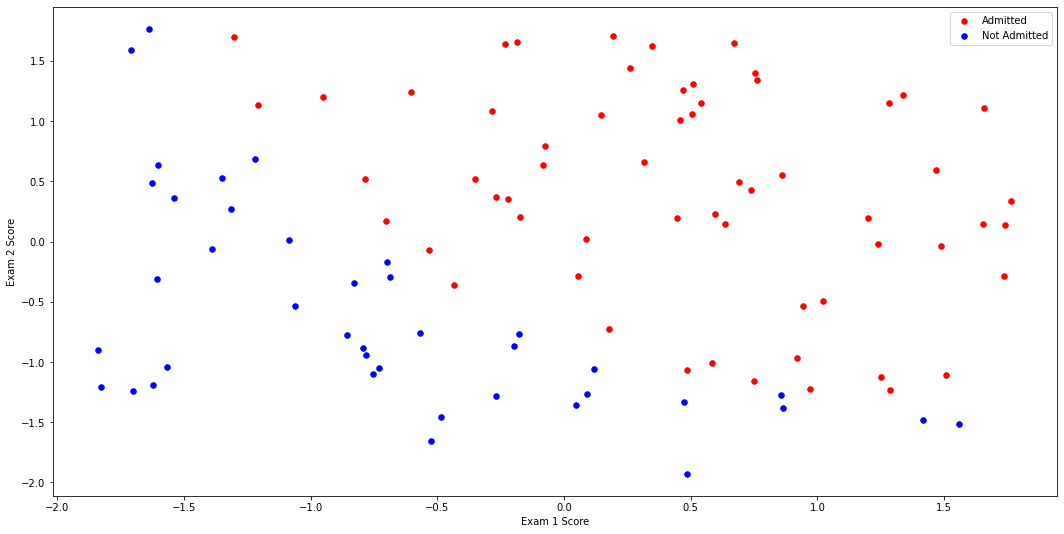

In [6]:
# Biểu diễn các điểm dữ liệu

plt.figure(figsize=(18, 9))
plt.scatter(pos['Score_1'], pos['Score_2'], c='r', s=30, label='Admitted')
plt.scatter(neg['Score_1'], neg['Score_2'], c='b', s=30, label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()

In [7]:
def sigmoid(z):
    return (1 / (1 + np.e**-z))

In [8]:
print('Sigmoid of z:', sigmoid(9999))
print('Expected sigmoid of z: 1.0')

Sigmoid of z: 1.0
Expected sigmoid of z: 1.0


In [9]:
def cost(theta, X, y):
    theta = theta.reshape(-1, 1)
    m = X.shape[0]
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    J = (1 / m) * (np.dot(np.log(y_pred).T, (-y)) - np.dot(np.log(1 - y_pred).T, (1 - y)))
    return J

In [10]:
def grad(theta, X, y):
    theta = theta.reshape(-1, 1)
    m = X.shape[0]
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    theta = (1 / m) * np.dot(X.T, y_pred - y)
    return theta

In [11]:
one = np.ones((X.shape[0], 1))

# Thêm bias vào X
X = np.concatenate((one, X), axis=1)

# Khởi tạo theta
initial_theta = np.ones(X.shape[1])

# Sử dụng Optimizer TNC của scipy
res = minimize(cost, initial_theta, args=(X, y), method='TNC', jac=grad, options={'maxiter':400})
print(res.message)

Converged (|f_n-f_(n-1)| ~= 0)


In [12]:
theta = res.x
print('θ0 = {}\nθ1 = {}\nθ2 = {}'.format(theta[0], theta[1], theta[2]))

θ0 = 1.7183802494866627
θ1 = 3.9926379827624907
θ2 = 3.725004423148375


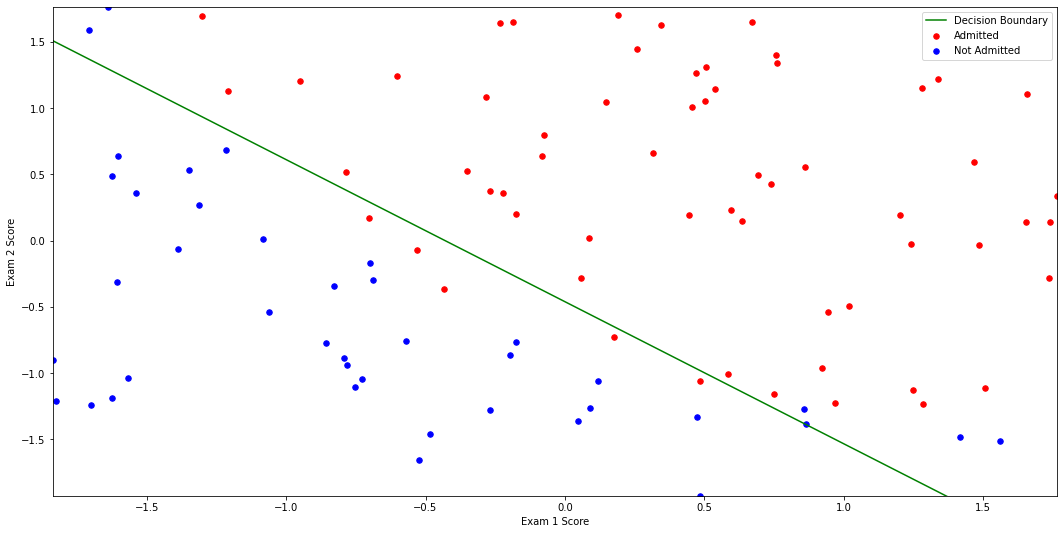

In [13]:
# Biểu diễn Decision Boundary

plot_x = [min(X[:,2])-2,  max(X[:,2])+2]
plot_y = [(-1/theta[2]) * (theta[1] * plot_x[0] + theta[0]), (-1/theta[2]) * (theta[1] * plot_x[1] + theta[0])]

pos = data.loc[data['target'] == 1, 'Score_1':'Score_2']
neg = data.loc[data['target'] == 0, 'Score_1':'Score_2']

plt.figure(figsize=(18, 9))
plt.plot(plot_x, plot_y, label='Decision Boundary', c='g')

plt.scatter(pos['Score_1'], pos['Score_2'], c='r', s=30, label='Admitted')
plt.scatter(neg['Score_1'], neg['Score_2'], c='b', s=30, label='Not Admitted')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.axis([min(X[:, 1]), max(X[:, 1]), min(X[:, 2]), max(X[:, 2])])
plt.show()

# Phần 2